# Heart Failure

In [14]:
import zipfile
import pandas as pd
import ehrapy as ep
from anndata import AnnData
import warnings
warnings.filterwarnings("ignore")


In [15]:
pd.set_option("display.max_columns", None)


## Getting the dataset

In [16]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv


File ‘heart_failure_clinical_records_dataset.csv’ already there; not retrieving.



# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [17]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv",
                   sep=",")


In [18]:
data["patient_id"] = range(1, len(data) + 1)


In [19]:
data.set_index("patient_id", inplace=True)


In [20]:
data.to_csv("heart_failure_ehrapy_prepared.csv")


## ehrapy sanity check

In [21]:
adata = ep.io.read("heart_failure_ehrapy_prepared.csv",
                   extension="csv",
                   index_column="patient_id")


In [22]:
adata.var_names


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Quality control metrics missing. Calculating...

scikit-learn-intelex is not available. Install via pip install scikit-learn-intelex  for 
faster imputations.

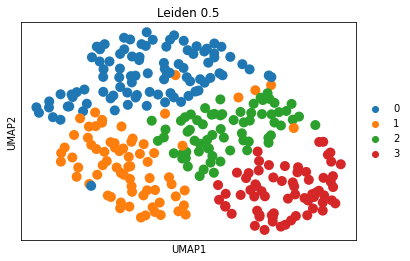

In [23]:
ep.pp.knn_impute(adata)
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")


In [24]:
adata.var_names


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

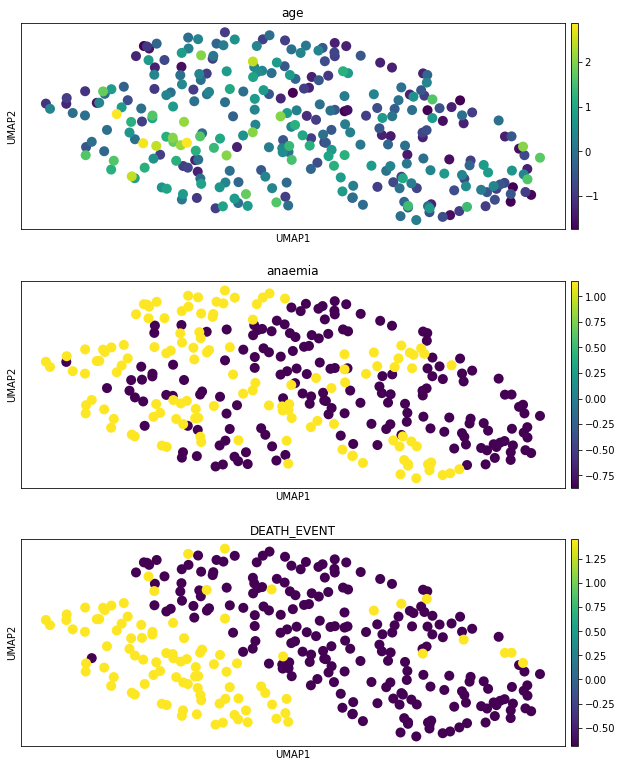

In [25]:
ep.pl.umap(adata, color=["age", "anaemia",
           "DEATH_EVENT", ], ncols=1, wspace=0.75)
